<a href="https://colab.research.google.com/github/rakshitha-5/Breast-Cancer-Detection-using-machine-learning-/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREAST CANCER DETECTION USING MACHINE LEARNING**!
Image source from: https://www.verywellhealth.com/thmb/LoHuaSfq_qbKGtSNk3yWBeS0f7s=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png
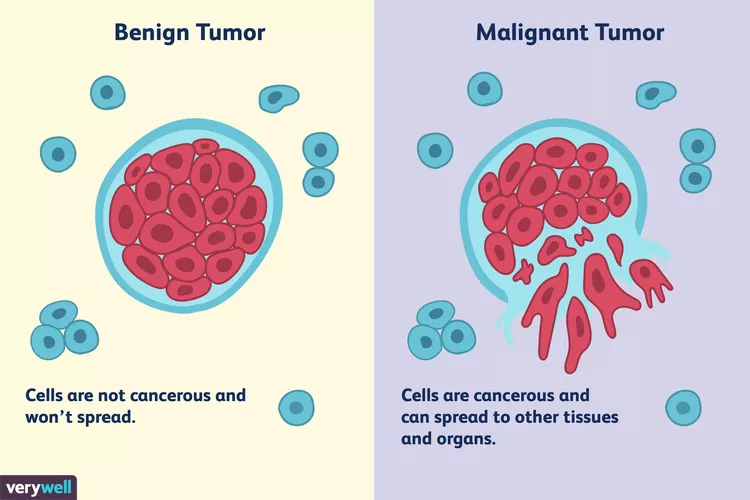


#  **IMPORTING THE DEPENDENCIES**





In [4]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **DATA COLLECTION AND PROCESSING**




In [5]:
#import data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('BCD_data.csv')
df.head(7)

Saving BCD_data.csv to BCD_data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


**To get last 5 rows of the dataframe :**

In [6]:
# print last 5 rows of the dataframe
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**count the number of rows and coloumn and get the info about the dataset:**

In [7]:
#count the number of rows and coloumn in the dataset
df.shape

(569, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Check if any Empty Values exist in dataset:**

In [9]:
#count the number of empty (NaN, NAN, na) values in each coloumn
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Drop the empty values:**

In [11]:
#drop the empty coloumn
df = df.dropna(axis=1)

In [12]:
#get the new count of the number of rows and coloumns
df.shape

(569, 32)

In [14]:
#Get a count of the number of malignant (M) or Benign (B) cells.
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64


*   **B - Beningn tumour:** A benign tumor is made up of cells that don't threaten to invade other tissues. The tumor cells are contained within the tumor and aren't abnormal or very different from surrounding cells.
*  **M- Malignant tumour:** Malignant tumors are made of cancer cells that can grow uncontrollably and invade nearby tissues. The cancer cells in a malignant tumor tend to be abnormal and very different from the normal surrounding tissue.



<Axes: xlabel='diagnosis', ylabel='count'>

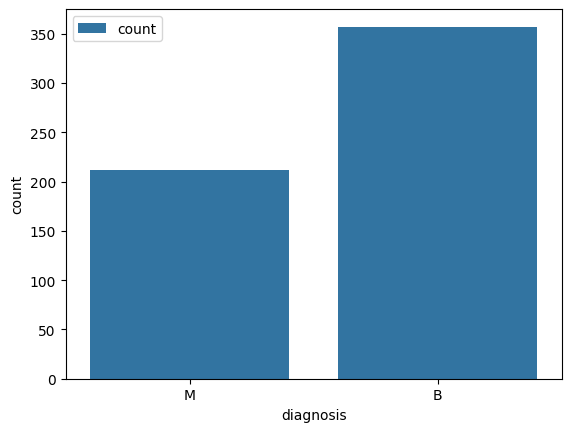

In [16]:
#visualize the count
sns.countplot(x = df['diagnosis'], label='count')


In [17]:
#look at the data types to see which coloumns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [19]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1]


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

In [20]:
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

**Create a Pair plot**

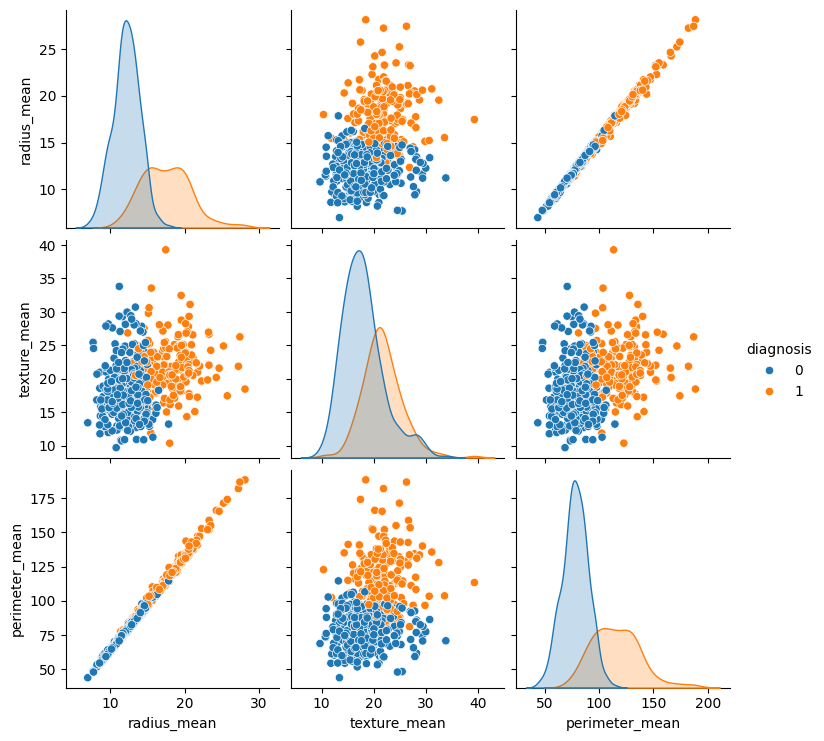

In [21]:
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

In [22]:
#print first 5 rows of new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

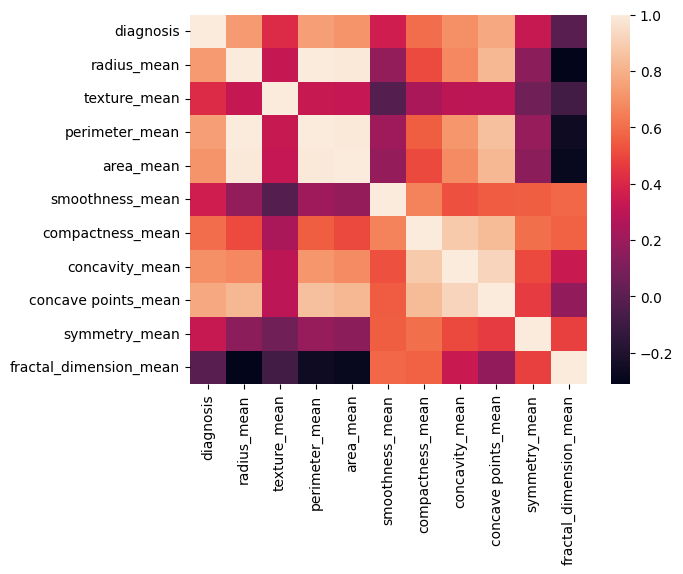

In [24]:
sns.heatmap(df.iloc[:,1:12].corr())

<Axes: >

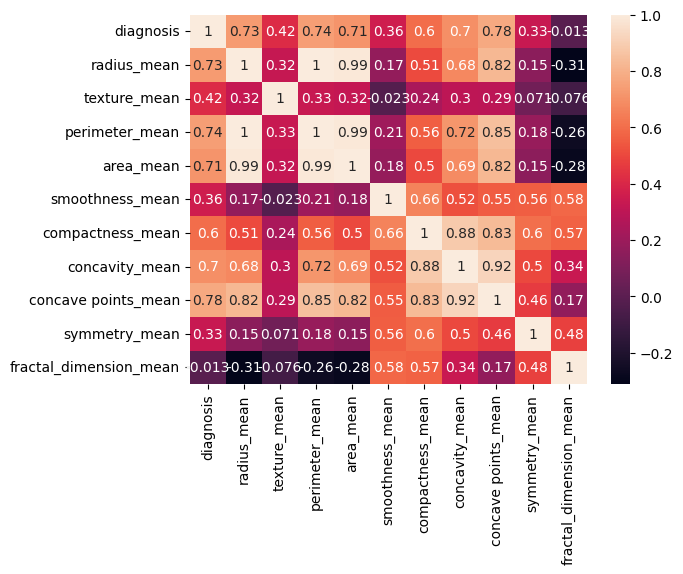

In [25]:
sns.heatmap(df.iloc[:,1:12].corr(), annot = True)

<Axes: >

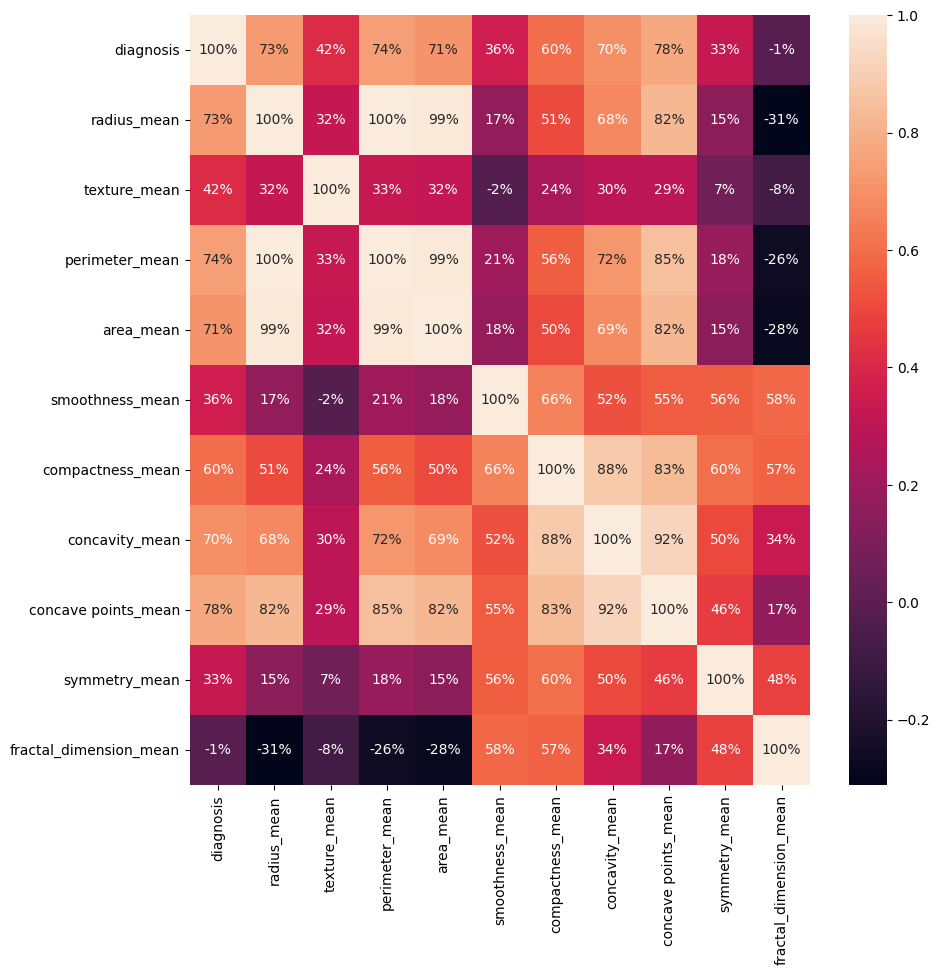

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot = True, fmt = '.0%')

In [30]:
#split the data set into independent (X) and dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

type(X)

numpy.ndarray

In [32]:
#split the data set into 75% taining and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5 , random_state = 0)

In [45]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [51]:
#Create a function for the Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def models(X_train, Y_train):
    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Decision Tree
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)

    # Random Forest Classifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # Print the model accuracy on the training data
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, tree, forest

In [53]:
Y_train.shape

(284,)

In [54]:
np.unique(Y_train)

array([0, 1], dtype=object)

In [56]:
Y_train = Y_train.astype(int)


In [57]:
#getting all of the models
model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy: 0.9894366197183099
[1] Decision Tree Classifier Training Accuracy: 1.0
[2] Random Forest Classifier Training Accuracy: 0.9964788732394366


In [60]:
Y_test = Y_test.astype(int)

In [61]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model[0].predict(X_test))
print(cm)

[[176   8]
 [  3  98]]


In [63]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1]
print(cm)
print('Testing Accuracy=', (TP + TN)/(TP + TN + FN + FP))

[[176   8]
 [  3  98]]
Testing Accuracy= 0.9614035087719298


In [66]:
for i in range( len(model)):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TP = cm[0][0]
  TN = cm[1][1]
  FP = cm[1][0]
  FN = cm[0][1]
  print(cm)
  print('Testing Accuracy=', (TP + TN)/(TP + TN + FN + FP))
  print()

Model  0
[[176   8]
 [  3  98]]
Testing Accuracy= 0.9614035087719298

Model  1
[[173  11]
 [ 12  89]]
Testing Accuracy= 0.9192982456140351

Model  2
[[175   9]
 [ 10  91]]
Testing Accuracy= 0.9333333333333333



In [68]:
#other ways to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model)):
  print('Model ', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       184
           1       0.92      0.97      0.95       101

    accuracy                           0.96       285
   macro avg       0.95      0.96      0.96       285
weighted avg       0.96      0.96      0.96       285

0.9614035087719298

Model  1
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       184
           1       0.89      0.88      0.89       101

    accuracy                           0.92       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.92      0.92      0.92       285

0.9192982456140351

Model  2
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       184
           1       0.91      0.90      0.91       101

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighte

In [69]:
#print the prediction of Random Forest Classifier Model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 